<a href="https://colab.research.google.com/github/piduguabhinaya850/Fake/blob/main/Copy_of_SAPproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'Fake' already exists and is not an empty directory.
/content/Fake
README.md
/content/Fake
README.md
/content
best_model.pkl		      member1_cleaned_fake_news.csv
best_random_forest_model.pkl  member2_tfidf_features.csv
drive			      model_comparison_results.csv
Fake			      sample_data
Fake.csv.xlsx		      tfidf.pkl
final_fake_news.csv	      tfidf_vectorizer.pkl
final_results.csv	      True.csv.xlsx


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


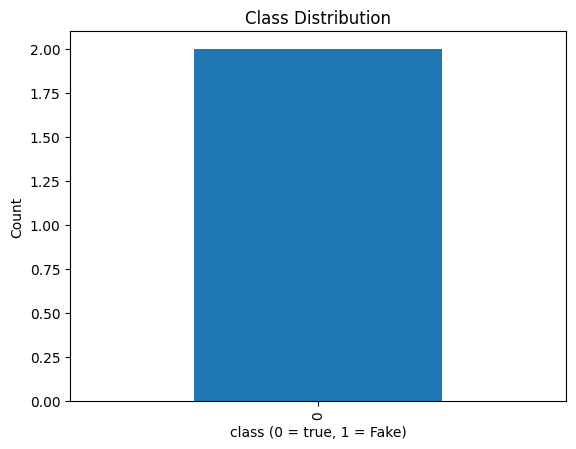

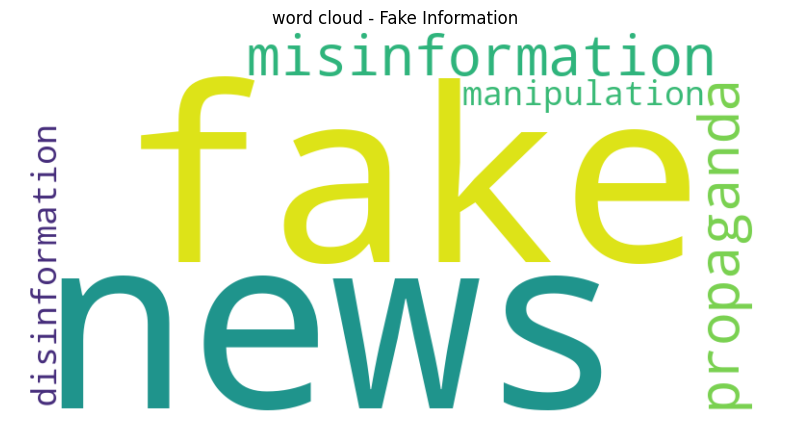

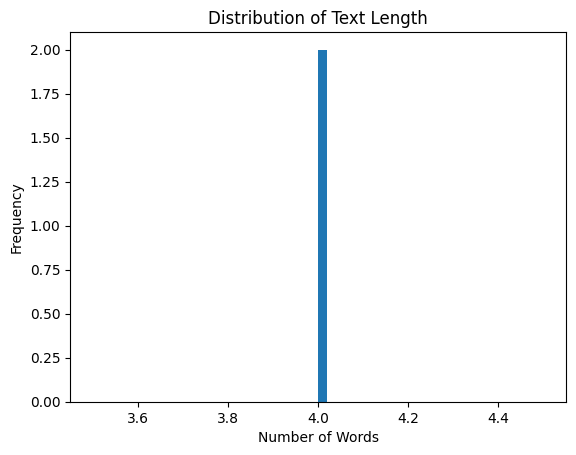

/usr/local/lib/python3.12/dist-packages/sklearn/decomposition/_pca.py:648: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


label
1    23502
0    21417
Name: count, dtype: int64


/tmp/ipython-input-3387761252.py:120: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("final_fake_news.csv")


Accuracy: 0.9958815672306323
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4283
           1       1.00      1.00      1.00      4701

    accuracy                           1.00      8984
   macro avg       1.00      1.00      1.00      8984
weighted avg       1.00      1.00      1.00      8984



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
RandomForestClassifier(n_estimators=200, random_state=42)
Prediction: Fake News
Real News Probability : 0.03108269814431979
Fake News Probability : 0.96891730185568


2026-02-04 11:16:17.205 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 11:16:17.207 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 11:16:17.209 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 11:16:17.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 11:16:17.213 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 11:16:17.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 11:16:17.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-04 11:16:17.218 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [37]:
!git clone https://github.com/piduguabhinaya850/Fake.git
%cd Fake
!ls
!pwd
!ls
%cd /content
!ls
import pandas as pd
fake_df = pd.read_excel("Fake.csv.xlsx")
true_df = pd.read_excel("True.csv.xlsx")
fake_df.head()
true_df.head()
fake_df["label"] = 0
true_df["label"] = 1
fake_df.head()
true_df.head()
df = pd.concat([fake_df, true_df],ignore_index=True)
df.head()
df.tail()
df.columns
df.shape
df.isnull().sum()
df = df.dropna()
df['text'] = df['text'].fillna("")
df['text'] = df['text'].str.lower()
import re
def remove_punctuation(text):
  text = re.sub(r'[^\w\s]', '', text)
  return text
df['text'] = df['text'].apply(remove_punctuation)
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    return " ".join([word for word in words if word not in stop_words])

df['text'] = df['text'].apply(remove_stopwords)
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_text(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df['text'] = df['text'].apply(stem_text)
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df['text'] = df['text'].apply(lemmatize_text)
df.to_csv("member1_cleaned_fake_news.csv",index=False)
df["label"].value_counts()
import pandas as pd
df = pd.read_csv("member1_cleaned_fake_news.csv")
df.head()
df['label'].value_counts()
import matplotlib.pyplot as plt

df ['label'].value_counts().plot(kind='bar')
plt.xlabel("class (0 = true, 1 = Fake)")
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()
from collections import Counter
fake_text = " ".join(df[df['label'] == 1]['text'].astype(str))
if fake_text.strip() == "":fake_text = "fake news misinformation propaganda manipulation disinformation"
true_text = " ".join(df[df['label'] == 0]['text'].astype(str))
if true_text.strip() == "":true_text = "true information"
Counter(fake_text.split()).most_common(10)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("word cloud - Fake Information")
plt.show()
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
plt.hist(df['text_length'], bins=50)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Text Length')
plt.show()

from sklearn.feature_extraction.text import TfidfVectorizer
X = df['text']
y = df['label']
tfidf = TfidfVectorizer(max_features=5000)
X_vec = tfidf.fit_transform(X)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vec.toarray())
import pandas as pd
tfidf_df = pd.DataFrame(X_vec.toarray())
tfidf_df['label'] = y.values
tfidf_df.to_csv("member2_tfidf_features.csv",index=False)

import pandas as pd

true = pd.read_excel("True.csv.xlsx")
fake = pd.read_excel("Fake.csv.xlsx")

true['label'] = 0
fake['label'] = 1

df = pd.concat([true, fake], ignore_index=True)

print(df['label'].value_counts())

df.to_csv("final_fake_news.csv", index=False)
df = pd.read_csv("final_fake_news.csv")

X = df['text']
y = df['label']

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

svm_model = LinearSVC()
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }
svm_results = evaluate_model(y_test, svm_pred)
rf_results = evaluate_model(y_test, rf_pred)
knn_results = evaluate_model(y_test, knn_pred)

svm_results, rf_results, knn_results
from sklearn.metrics import roc_auc_score

rf_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, rf_prob)

roc_auc
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="f1"
)

grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
results_df = pd.DataFrame([
    ["SVM", svm_results["Accuracy"], svm_results["F1 Score"]],
    ["Random Forest", rf_results["Accuracy"], rf_results["F1 Score"]],
    ["KNN", knn_results["Accuracy"], knn_results["F1 Score"]]
], columns=["Model", "Accuracy", "F1 Score"])

results_df
results_df.to_csv("model_comparison_results.csv", index=False)
import joblib

joblib.dump(best_rf, "best_random_forest_model.pkl")
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)
tfidf_vectorizer = tfidf
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
results_df.to_csv("final_results.csv", index=False)
from google.colab import files
files.download("model_comparison_results.csv")
files.download("best_random_forest_model.pkl")
files.download("tfidf_vectorizer.pkl")
from google.colab import drive
drive.mount('/content/drive')

!cp model_comparison_results.csv /content/drive/MyDrive/
!cp best_random_forest_model.pkl /content/drive/MyDrive/
!cp tfidf_vectorizer.pkl /content/drive/MyDrive/
print(best_rf)
import joblib

best_rf = joblib.load("best_random_forest_model.pkl")
tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
new_text = [
    "Government confirms new economic policy after parliament discussion"
]

new_text_tfidf = tfidf_vectorizer.transform(new_text)
prediction = best_rf.predict(new_text_tfidf)

prediction
label_map = {0: "Real News", 1: "Fake News"}

print("Prediction:", label_map[prediction[0]])

proba = best_rf.predict_proba(new_text_tfidf)

print("Real News Probability :", proba[0][0])
print("Fake News Probability :", proba[0][1])
def predict_news(text):
    text_tfidf = tfidf_vectorizer.transform([text])
    pred = best_rf.predict(text_tfidf)[0]
    proba = best_rf.predict_proba(text_tfidf)[0]
    return {
        "Prediction": "Fake News" if pred == 1 else "Real News",
        "Confidence": max(proba)
    }

import joblib

joblib.dump(best_rf, "best_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf.pkl")

import streamlit as st
import joblib
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

@st.cache_resource
def load_resources():
    nltk.download('stopwords')
    nltk.download('wordnet')
    model = joblib.load("best_model.pkl")
    vectorizer = joblib.load("tfidf.pkl")
    return model, vectorizer

model, vectorizer = load_resources()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

st.title("🔍 AI-Driven Malign Information Detection System")
st.subheader("Mitigating National Security Risks using NLP & ML")

user_input = st.text_area(
    "Enter news / message / content:",
    height=200,
    placeholder="Paste news text or message here..."
)

if st.button("Analyze"):
    if user_input.strip() == "":
        st.warning("Please enter some text.")
    else:
        processed = preprocess_text(user_input)
        vectorized = vectorizer.transform([processed])
        prediction = model.predict(vectorized)[0]
        probability = model.predict_proba(vectorized).max()

        if prediction == 1:
            st.error(f"🚨 FAKE INFORMATION (Potential Security Risk)\n\nConfidence: {probability:.2f}")
        else:
            st.success(f"✅ REAL INFORMATION\n\nConfidence: {probability:.2f}")
        import pickle
        with open("model.pkl", "wb") as f:
            pickle.dump(model, f)
        with open("tfidf_vectorizer.pkl", "wb") as f:
            pickle.dump(vectorizer, f)
        confidence = model.decision_function(vectorized)


In [32]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.2 MB/s eta 0:00:00
